# Ficha #04 - Filtragem na frequência

In [2]:
%pylab inline
# Stdlib imports

# Third-party libraries
import numpy as np
from io import BytesIO
from IPython.display import Image
from ipywidgets import interact, interactive, fixed
from scipy import fftpack
import math
gray()

Populating the interactive namespace from numpy and matplotlib


In [3]:
def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=None, vmax=None)
        out = buffer.getvalue()
    return Image(out)

**Questão #1**: Reproduza as filtragens descritas na figura 4.43 (slide 13, "L07 - Análise na Frequência - PII").

In [4]:
def filtro_freq_ideal(img, D0 = 10):
    # Obter os parametros de padding
    M, N = img.shape
    P = 2*M
    Q = 2*N
    
    #Imagem extendida (padded) da imagem inicial
    f_pad = np.zeros((P, Q), dtype=float64)
    f_pad[0:M, 0:N] = img
        
    # Ciclo para centrar a imagem 
    # Para optimizar usar só o 1º quadrante MxN
    for i in range(M):
        for j in range(N):
            f_pad[i,j] = f_pad[i,j] * pow( -1, i+j) 
    
    # Calculo da transformada DFT 
    F = fftpack.fft2(f_pad) 
    
    # Geração filtro atraves da função H 
    H = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            d_uv = pow( ((u - P/2)**2 + (v-Q/2)**2), 1/2)
            if d_uv <= D0 : H[u,v] = 1   
    
    # Funcao G
    G = F * H
    
    # Imagem processada
    G_inv = fftpack.ifft2(G).real #Já convertido de complexo para real
    g_processada = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            g_processada[u,v] = G_inv[u,v] * pow((-1), (u+v))
    
    return g_processada[0:M, 0:N]

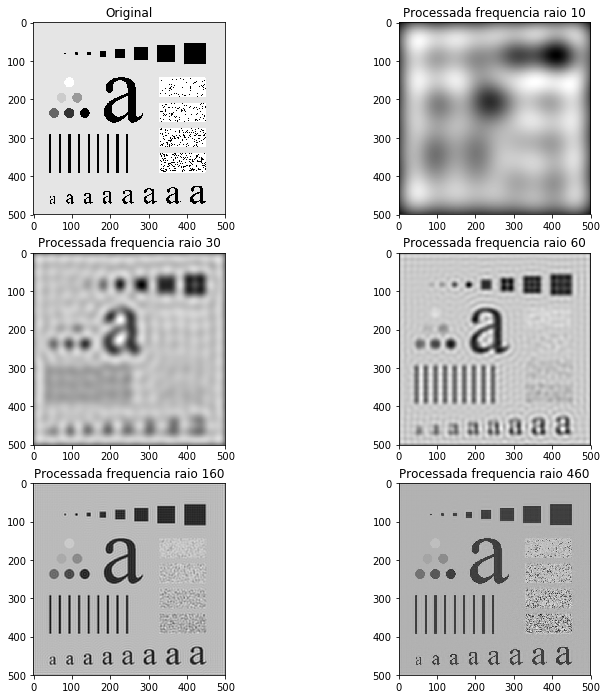

In [5]:
i = imread("images/test_pattern_blurring_orig.tif")
i_10 = filtro_freq_ideal(i, D0=10)
i_30 = filtro_freq_ideal(i, D0=30)
i_60 = filtro_freq_ideal(i, D0=60)
i_160 = filtro_freq_ideal(i, D0=160)
i_460 = filtro_freq_ideal(i, D0=460)

_, ax = subplots(3,2,figsize = (12,12))
ax[0,0].imshow(i)
ax[0,0].set_title("Original")
ax[0,1].imshow(i_10)
ax[0,1].set_title("Processada frequencia raio 10")
ax[1,0].imshow(i_30)
ax[1,0].set_title("Processada frequencia raio 30")
ax[1,1].imshow(i_60)
ax[1,1].set_title("Processada frequencia raio 60")
ax[2,0].imshow(i_160)
ax[2,0].set_title("Processada frequencia raio 160")
ax[2,1].imshow(i_460)
ax[2,1].set_title("Processada frequencia raio 460")


**Questão #2**: Reproduza as filtragens descritas na figura 4.45 (slide 15, "L07 - Análise na Frequência - PII").

In [6]:
def filtro_Butterworth(img, D0 = 10, exp=2):
    # Obter os parametros de padding
    M, N = img.shape
    P = 2*M
    Q = 2*N
    
    #Imagem extendida (padded) da imagem inicial
    f_pad = np.zeros((P, Q), dtype=float64)
    f_pad[0:M, 0:N] = img
        
    # Ciclo para centrar a imagem 
    # Para optimizar usar só o 1º quadrante MxN
    for i in range(M):
        for j in range(N):
            f_pad[i,j] = f_pad[i,j] * pow( -1, i+j) 
    
    # Calculo da transformada DFT 
    F = fftpack.fft2(f_pad) 
    
    # Geração filtro atraves da função H 
    H = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            d_uv = pow( ((u - P/2)**2 + (v-Q/2)**2), 1/2)
            denominador = 1 + pow( (d_uv/D0), 2*exp)    
            H[u,v] = 1 / denominador
            
    # Funcao G
    G = F * H
    
    # Imagem processada
    G_inv = fftpack.ifft2(G).real #Já passa de complexo paea real
    g_processada = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            g_processada[u,v] = G_inv[u,v] * pow((-1), (u+v))
    
    return g_processada[0:M, 0:N]

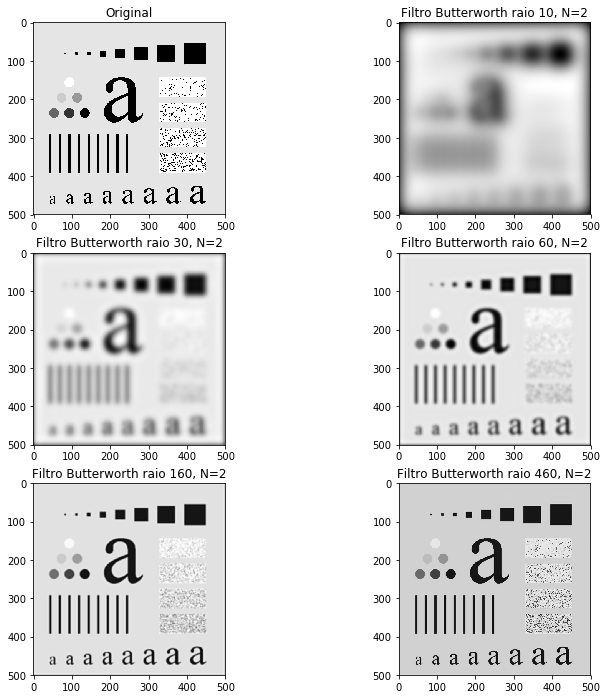

In [7]:
i = imread("images/test_pattern_blurring_orig.tif")
i_10 = filtro_Butterworth(i, exp=2, D0=10)
i_30 = filtro_Butterworth(i, exp=2, D0=30)
i_60 = filtro_Butterworth(i, exp=2, D0=60)
i_160 = filtro_Butterworth(i, exp=2, D0=160)
i_460 = filtro_Butterworth(i,  exp=2, D0=460)

_, ax = subplots(3,2,figsize = (12,12))
ax[0,0].imshow(i)
ax[0,0].set_title("Original")
ax[0,1].imshow(i_10)
ax[0,1].set_title("Filtro Butterworth raio 10, N=2")
ax[1,0].imshow(i_30)
ax[1,0].set_title("Filtro Butterworth raio 30, N=2")
ax[1,1].imshow(i_60)
ax[1,1].set_title("Filtro Butterworth raio 60, N=2")
ax[2,0].imshow(i_160)
ax[2,0].set_title("Filtro Butterworth raio 160, N=2")
ax[2,1].imshow(i_460)
ax[2,1].set_title("Filtro Butterworth raio 460, N=2")

**Questão #3**: Reproduza as filtragens descritas na figura 4.48 (slide 18, "L07 - Análise na Frequência - PII").

In [8]:
def filtro_Gaussian(img, D0 = 10):
    # Obter os parametros de padding
    M, N = img.shape
    P = 2*M
    Q = 2*N
    
    #Imagem extendida (padded) da imagem inicial
    f_pad = np.zeros((P, Q), dtype=float64)
    f_pad[0:M, 0:N] = img
        
    # Ciclo para centrar a imagem 
    # Para optimizar usar só o 1º quadrante MxN
    for i in range(M):
        for j in range(N):
            f_pad[i,j] = f_pad[i,j] * pow( -1, i+j) 
    
    # Calculo da transformada DFT 
    F = fftpack.fft2(f_pad) 
    
    # Geração filtro atraves da função H 
    H = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            d_uv = pow( ((u - P/2)**2 + (v-Q/2)**2), 1/2) 
            e = (d_uv**2)/((2*D0)**2 + 1e-5)
            H[u,v] = exp(-e)
            
    # Funcao G
    G = F * H
    
    # Imagem processada
    G_inv = fftpack.ifft2(G).real #Já passa de complexo paea real
    g_processada = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            g_processada[u,v] = G_inv[u,v] * pow((-1), (u+v))
    
    ''' 
    _, ax = subplots(1,3,figsize = (12,12))
    ax[0].imshow(log10(abs(H)+1e-5))
    ax[0].set_title("Espectro do filtro butterworth band reject H")
    ax[1].imshow(log10(abs(F)+1e-5))
    ax[1].set_title("Espectro da transformada F (DFT)")
    ax[2].imshow(log10(abs(G)+1e-5))
    ax[2].set_title("Espectro do filtro real e simetrico G")
    ''' 
    
    return g_processada[0:M, 0:N]

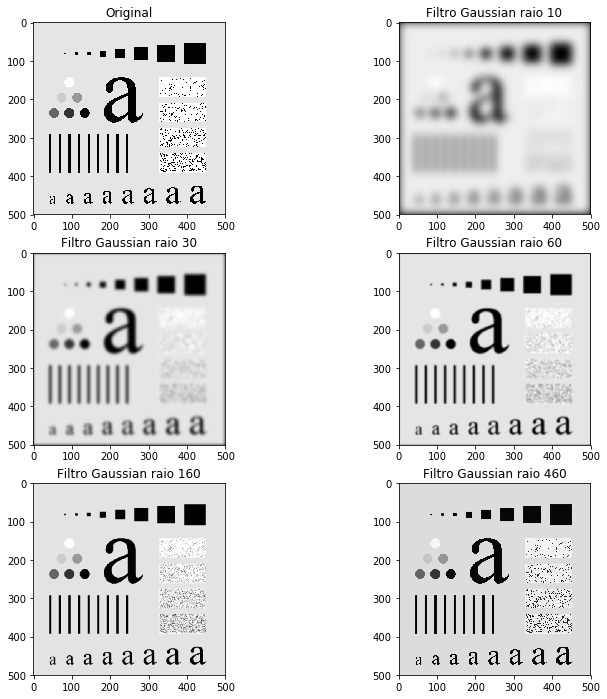

In [9]:
i = imread("images/test_pattern_blurring_orig.tif")
i_10 = filtro_Gaussian(i, D0=10)
i_30 = filtro_Gaussian(i, D0=30)
i_60 = filtro_Gaussian(i, D0=60)
i_160 = filtro_Gaussian(i, D0=160)
i_460 = filtro_Gaussian(i, D0=460)

_, ax = subplots(3,2,figsize = (12,12))
ax[0,0].imshow(i)
ax[0,0].set_title("Original")
ax[0,1].imshow(i_10)
ax[0,1].set_title("Filtro Gaussian raio 10")
ax[1,0].imshow(i_30)
ax[1,0].set_title("Filtro Gaussian raio 30")
ax[1,1].imshow(i_60)
ax[1,1].set_title("Filtro Gaussian raio 60")
ax[2,0].imshow(i_160)
ax[2,0].set_title("Filtro Gaussian raio 160")
ax[2,1].imshow(i_460)
ax[2,1].set_title("Filtro Gaussian raio 460")

**Questão #4**: Reproduza as filtragens descritas no slide 6 ("L07 - Análise na Frequência - PIII").

In [16]:
def filtro_Butterworth_BandReject(img, D0 = 10, exp=2, w=10):
    # Obter os parametros de padding
    M, N = img.shape
    P = 2*M
    Q = 2*N
    
    #Imagem extendida (padded) da imagem inicial
    f_pad = np.zeros((P, Q), dtype=float64)
    f_pad[0:M, 0:N] = img
        
    # Ciclo para centrar a imagem 
    # Para optimizar usar só o 1º quadrante MxN
    for i in range(M):
        for j in range(N):
            f_pad[i,j] = f_pad[i,j] * pow( -1, i+j) 
    
    # Calculo da transformada DFT 
    F = fftpack.fft2(f_pad) 
    
    #Locais/Pontos do espectro com frequencias que se querem rejeitar 
    pontos = np.array([[90, 110],
                      [180, 110],
                      [330, 110],
                      [410, 110],
                      [90,  210],
                      [180, 210],
                      [330, 210],
                      [410, 210]])

    # Geração filtro atraves da função H
    H = []
    for i in range(pontos.shape[0]):
        H.append(np.zeros((P, Q), dtype=float64))
        
    for u in range(P):
        for v in range(Q):
            # Definir uma função H por cada zona do espectro que queremos rejeitar
            # ou seja, na zona onde estão os pontos definidos acima
            for i in range(pontos.shape[0]):
                ux = pontos[i][0]
                vx = pontos[i][1]
                d_uv = pow( ((u - ux)**2 + (v - vx)**2), 1/2) 
                denominador = 1 + pow((d_uv * w)/((d_uv**2 - D0**2) + 1e-5), 2*exp) 
                H[i][u,v] = 1/(denominador)   
    
    # O filtro H final é o produtório das sub matrizes H definidas para cada
    # zona do espectro a rejeitar. Multiplica-se para garantir que ficam o valor
    # zero/0 nos pixeis que queremos tratar
    #     H_final = H[0]*H[1]*H[2]*H[3]*H[4]*H[5]*H[6]*H[7]
    H_final = H[0]
    for i in range(1, len(H)):
        H_final *= H[i]
    
    # Funcao G
    G = F.real * H_final
    
    # Imagem processada - inverse discrete Fourier Transform.
    G_inv = fftpack.ifft2(G).real #Já passa de complexo paea real
    g_processada = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            g_processada[u,v] = G_inv[u,v] * pow((-1), (u+v))
    
    _, ax = subplots(1,3,figsize = (12,12))
    ax[0].imshow(log10(abs(H_final)+1e-5))
    ax[0].set_title("Espectro do filtro butterworth band reject H")
    ax[1].imshow(log10(abs(F)+1e-5))
    ax[1].set_title("Espectro da transformada F (DFT)")
    ax[2].imshow(log10(abs(G)+1e-5))
    ax[2].set_title("Espectro do filtro real e simetrico G")
    
    return g_processada[0:M, 0:N]

C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars


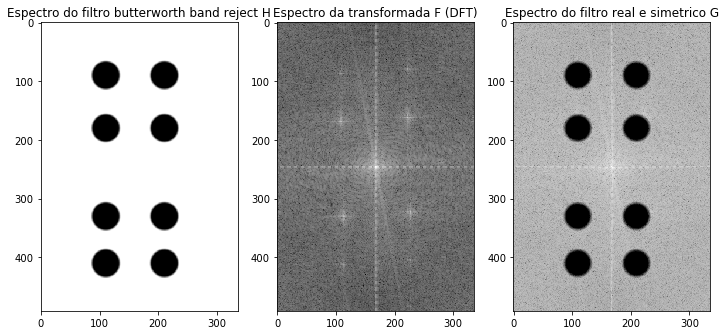

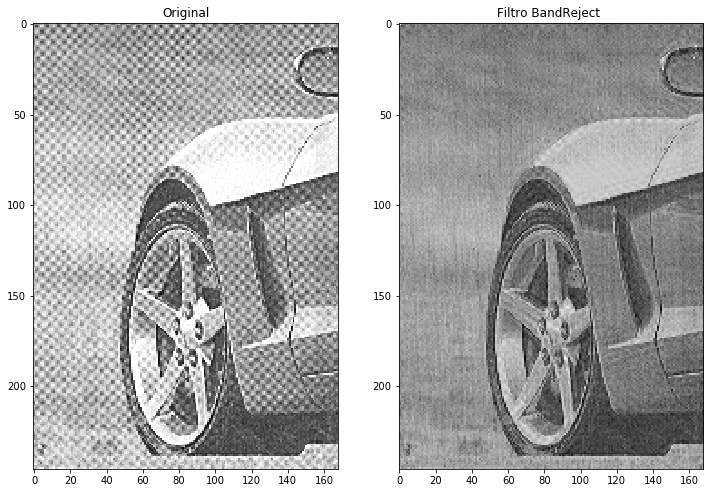

In [17]:
i = imread("images/Fig0421(car_newsprint_sampled_at_75DPI).tif")
i_10 = filtro_Butterworth_BandReject(i, D0=3, exp=40, w=25)

_, ax = subplots(1,2,figsize = (12,12))
ax[0].imshow(i)
ax[0].set_title("Original")
ax[1].imshow(i_10)
ax[1].set_title("Filtro BandReject ")


**Questão #5**: Reproduza as filtragens descritas no slide 7 ("L07 - Análise na Frequência - PIII").

In [11]:
def filtro_vertical_BandReject(img, Delta = 10, abertura=80, w=10):
    # Obter os parametros de padding
    M, N = img.shape
    P = 2*M
    Q = 2*N
    
    #Imagem extendida (padded) da imagem inicial
    f_pad = np.zeros((P, Q), dtype=float64)
    f_pad[0:M, 0:N] = img
        
    # Ciclo para centrar a imagem 
    # Para optimizar usar só o 1º quadrante MxN
    for i in range(M):
        for j in range(N):
            f_pad[i,j] = f_pad[i,j] * pow( -1, i+j) 
    
    # Calculo da transformada DFT 
    F = fftpack.fft2(f_pad) 

    # Geração filtro atraves da função H
    H = np.ones((P, Q), dtype=float64)
    ''' Segundo os slides, o filtro H deve limpar a linha vertical que 
    se visualiza no espectro da derivada DFT. 
    Essa linha está a meio da imagem = shape[0]/2. 
    O parametro deltra permite engrossas esta linha vertical ''' 

    corteV = H.shape[1] // 2
    corteH = H.shape[0] // 2
    for u in range(H.shape[0]):
        for v in range(corteV-Delta//2, corteV+Delta//2):
            H[u][v] = 0
            for l in range(corteH-abertura//2, corteH+abertura//2):
                H[l][v] = 1
    
        
    #for u in range(corteH-abertura//2, corteH+abertura//2):
    #        H[u][corteV] = 1
    
    # Funcao G
    G = F.real * H
    
    # Imagem processada - inverse discrete Fourier Transform.
    G_inv = fftpack.ifft2(G).real #Já passa de complexo paea real
    g_processada = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            g_processada[u,v] = G_inv[u,v] * pow((-1), (u+v))
    
    _, ax = subplots(1,3,figsize = (12,12))
    ax[0].imshow(log10(abs(H)+1e-5))
    ax[0].set_title("Espectro do filtro butterworth band reject H")
    ax[1].imshow(log10(abs(F)+1e-5))
    ax[1].set_title("Espectro da transformada F (DFT)")
    ax[2].imshow(log10(abs(G)+1e-5))
    ax[2].set_title("Espectro do filtro real e simetrico G")
    
    return g_processada[0:M, 0:N]

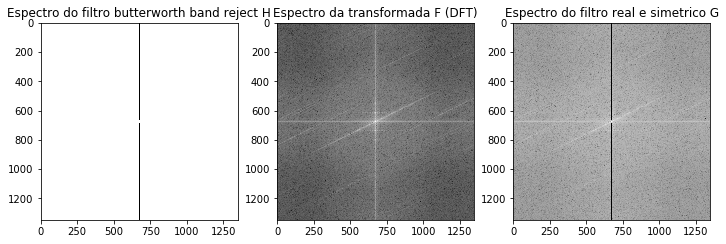

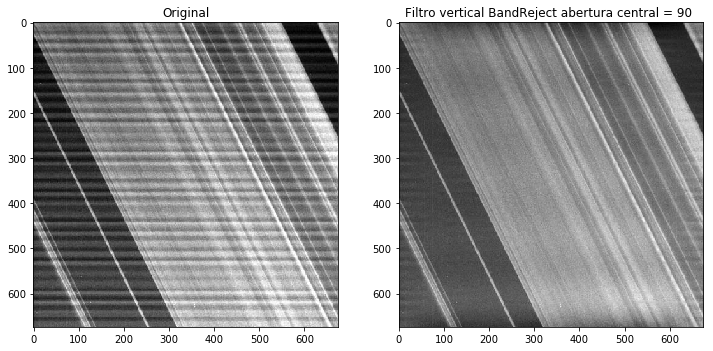

In [16]:
i = imread("images/Fig0465(a)(cassini).tif")
i_10 = filtro_vertical_BandReject(i, Delta=10, abertura=20, w=100)

_, ax = subplots(1,2,figsize = (12,12))
ax[0].imshow(i)
ax[0].set_title("Original")
ax[1].imshow(i_10)
ax[1].set_title("Filtro vertical BandReject abertura central = 90 ")


**Questão #6**: Proponha um algoritmo para realçar a imagem "Fig0505(a)(applo17_boulder_noisy)".

In [103]:
def homomorphic_filter(img, Delta = 10, abertura=80, w=10):
    # Obter os parametros de padding
    M, N = img.shape
    P = 2*M
    Q = 2*N
    
    #Imagem extendida (padded) da imagem inicial
    f_pad = np.zeros((P, Q), dtype=float64)
    f_pad[0:M, 0:N] = img
        
    # Ciclo para centrar a imagem 
    # Para optimizar usar só o 1º quadrante MxN
    for i in range(M):
        for j in range(N):
            f_pad[i,j] = f_pad[i,j] * pow( -1, i+j) 
    
    # Calculo da transformada DFT 
    F = fftpack.fft2(f_pad) 

    # Geração filtro atraves da função H
    H = np.ones((P, Q), dtype=float64)
    ''' Pela analise do espectro da derivada DFT, é visivel uma grelha
    que deve ser removida pelo filtro H 
        Nesta solução, com a aplicação de um cruz, já se notam algumas melhorias
        A implementação de uma grelha nao foi conseguida por dificuldades técnicas
    e pela dificuldade em fazer coincidir as linhas da grelha com as linhas do 
    espectro a remover ''' 
    corteV = H.shape[1] // 2
    #Colocar linha verticais com zeros
    for u in range(H.shape[0]):
        for v in range(corteV-Delta//2, corteV+Delta//2):
            H[u][v] = 0
    
    #Colocar linha horizontal com zeros
    corteH = H.shape[0] // 2 
    for u in range(corteH-Delta//2, corteH+Delta//2):
        for v in range(H.shape[1]):
            H[u][v] = 0
        
    # Abertura nas linhas verticais
    for v in range(corteV-abertura//2, corteV+abertura//2):
        H[corteH][v] = 1

    # Abertura nas linhas horizontais
    for u in range(corteH-abertura//2, corteH+abertura//2):
        H[u][corteV] = 1       
    
    # Funcao G
    G = F.real * H
    
    # Imagem processada - inverse discrete Fourier Transform.
    G_inv = fftpack.ifft2(G).real #Já passa de complexo paea real
    g_processada = np.zeros((P, Q), dtype=float64)
    for u in range(P):
        for v in range(Q):
            g_processada[u,v] = G_inv[u,v] * pow((-1), (u+v))
    
    _, ax = subplots(1,3,figsize = (12,12))
    ax[0].imshow(log10(abs(H)+1e-5))
    ax[0].set_title("Espectro do filtro butterworth band reject H")
    ax[1].imshow(log10(abs(F)+1e-5))
    ax[1].set_title("Espectro da transformada F (DFT)")
    ax[2].imshow(log10(abs(G)+1e-5))
    ax[2].set_title("Espectro do filtro real e simetrico G")
    
    return g_processada[0:M, 0:N]


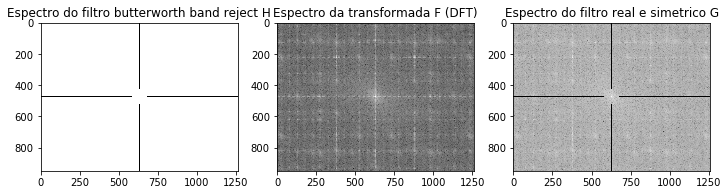

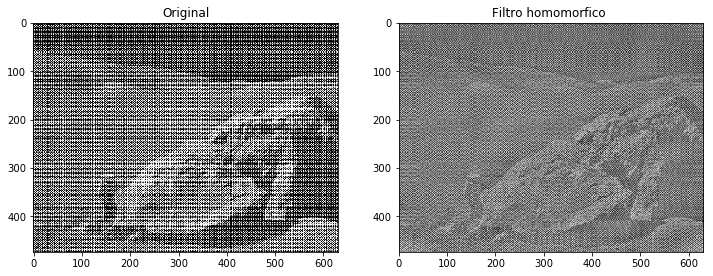

In [104]:
i = imread("images/Fig0505(a)(applo17_boulder_noisy).tif")
i_10 = homomorphic_filter(i, Delta = 10, abertura=90, w=10)

_, ax = subplots(1,2,figsize = (12,12))
ax[0].imshow(i)
ax[0].set_title("Original")
ax[1].imshow(i_10)
ax[1].set_title("Filtro homomorfico ")